# Monetary Economics: Chapter 5

### Preliminaries

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

import matplotlib.pyplot as plt

from pysolve.model import Model
from pysolve.utils import is_close,round_solution


### Model LP1

In [2]:
def create_lp1_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by government')
    model.var('BLd', desc='Demand for government bonds')
    model.var('BLh', desc='Government bonds held by households')
    model.var('BLs', desc='Supply of government bonds')
    model.var('CG', desc='Capital gains on bonds')
    model.var('CGe', desc='Expected capital gains on bonds')
    model.var('C', desc='Consumption')
    model.var('ERrbl', desc='Expected rate of return on bonds')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('Pbl', desc='Price of bonds')
    model.var('Pble', desc='Expected price of bonds')
    model.var('Rb', desc='Interest rate on government bills')
    model.var('Rbl', desc='Interest rate on government bonds')
    model.var('T', desc='Taxes')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YDr', desc='Regular disposable income of households')
    model.var('YDre', desc='Expected regular disposable income of households')

    model.set_param_default(0)
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('chi', desc='Weight of conviction in expected bond price')
    model.param('lambda10', desc='Parameter in asset demand function')
    model.param('lambda12', desc='Parameter in asset demand function')
    model.param('lambda13', desc='Parameter in asset demand function')
    model.param('lambda14', desc='Parameter in asset demand function')
    model.param('lambda20', desc='Parameter in asset demand function')
    model.param('lambda22', desc='Parameter in asset demand function')
    model.param('lambda23', desc='Parameter in asset demand function')
    model.param('lambda24', desc='Parameter in asset demand function')
    model.param('lambda30', desc='Parameter in asset demand function')
    model.param('lambda32', desc='Parameter in asset demand function')
    model.param('lambda33', desc='Parameter in asset demand function')
    model.param('lambda34', desc='Parameter in asset demand function')
    model.param('theta', desc='Tax rate')

    model.param('G', desc='Government goods')
    model.param('Rbar', desc='Exogenously set interest rate on govt bills')
    model.param('Pblbar', desc='Exogenously set price of bonds')

    model.add('Y = C + G')                                  # 5.1
    model.add('YDr = Y - T + Rb(-1)*Bh(-1) + BLh(-1)')      # 5.2
    model.add('T = theta *(Y + Rb(-1)*Bh(-1) + BLh(-1))')    # 5.3
    model.add('V - V(-1) = (YDr - C) + CG')                 # 5.4
    model.add('CG = (Pbl - Pbl(-1))*BLh(-1)')
    model.add('C = alpha1*YDre + alpha2*V(-1)')
    model.add('Ve = V(-1) + (YDre - C) + CG')
    model.add('Hh = V - Bh - Pbl*BLh')
    model.add('Hd = Ve - Bd - Pbl*BLd')
    model.add('Bd = Ve*lambda20 + Ve*lambda22*Rb' +
              '- Ve*lambda23*ERrbl - lambda24*YDre')
    model.add('BLd = (Ve*lambda30 - Ve*lambda32*Rb ' +
              '+ Ve*lambda33*ERrbl - lambda34*YDre)/Pbl')
    model.add('Bh = Bd')
    model.add('BLh = BLd')
    model.add('Bs - Bs(-1) = (G + Rb(-1)*Bs(-1) + ' +
              'BLs(-1)) - (T + Rb(-1)*Bcb(-1)) - (BLs - BLs(-1))*Pbl')
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')
    model.add('Bcb = Bs - Bh')
    model.add('BLs = BLh')
    model.add('ERrbl = Rbl + chi * (Pble - Pbl) / Pbl')
    model.add('Rbl = 1./Pbl')
    model.add('Pble = Pbl')
    model.add('CGe = chi * (Pble - Pbl)*BLh')
    model.add('YDre = YDr(-1)')
    model.add('Rb = Rbar')
    model.add('Pbl = Pblbar')

    return model

lp1_parameters = {'alpha1': 0.8,
                  'alpha2': 0.2,
                  'chi': 0.1,
                  'lambda20': 0.44196,
                  'lambda22': 1.1,
                  'lambda23': 1,
                  'lambda24': 0.03,
                  'lambda30': 0.3997,
                  'lambda32': 1,
                  'lambda33': 1.1,
                  'lambda34': 0.03,
                  'theta': 0.1938}
lp1_exogenous = {'G': 20,
                 'Rbar': 0.03,
                 'Pblbar': 20}
lp1_variables = {'V': 95.803,
                 'Bh': 37.839,
                 'Bs': 57.964,
                 'Bcb': 57.964 - 37.839,
                 'BLh': 1.892,
                 'BLs': 1.892,
                 'Hs': 20.125,
                 'YDr': 95.803,
                 'Rb': 0.03,
                 'Pbl': 20}


### Scenario: Interest rate shock

In [3]:
lp1 = create_lp1_model()
lp1.set_values(lp1_parameters)
lp1.set_values(lp1_exogenous)
lp1.set_values(lp1_variables)

for _ in range(15):
    lp1.solve(iterations=100, threshold=1e-6)

# shock the system
lp1.set_values({'Rbar': 0.04,
                'Pblbar': 15})
for _ in range(45):
    lp1.solve(iterations=100, threshold=1e-6)

###### Figure 5.2

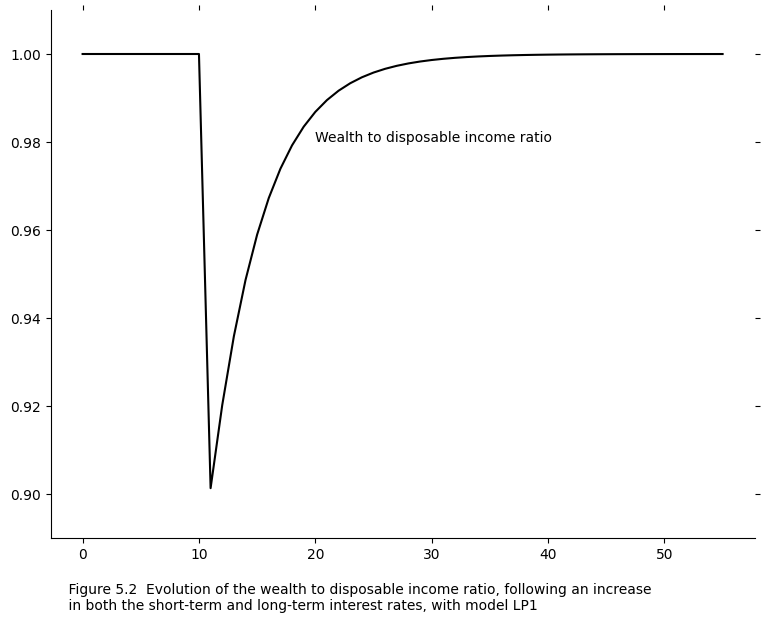

In [4]:
caption = '''
    Figure 5.2  Evolution of the wealth to disposable income ratio, following an increase
    in both the short-term and long-term interest rates, with model LP1'''
data = [s['V']/s['YDr'] for s in lp1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.89, 1.01)

axes.plot(data, 'k')

# add labels
plt.text(20, 0.98, 'Wealth to disposable income ratio')
fig.text(0.1, -.05, caption);

###### Figure 5.3

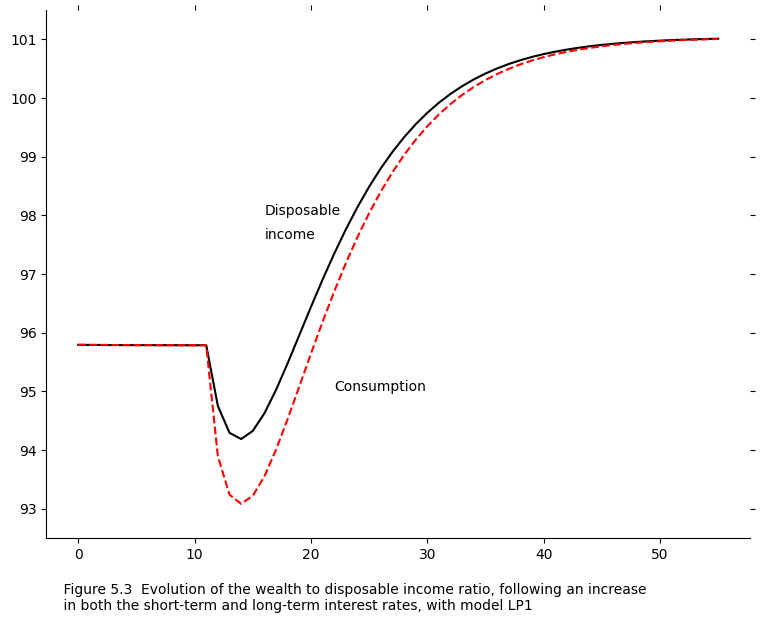

In [5]:
caption = '''
    Figure 5.3  Evolution of the wealth to disposable income ratio, following an increase
    in both the short-term and long-term interest rates, with model LP1'''
ydrdata = [s['YDr'] for s in lp1.solutions[5:]]
cdata = [s['C'] for s in lp1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(92.5, 101.5)

axes.plot(ydrdata, 'k')
axes.plot(cdata, linestyle='--', color='r')

# add labels
plt.text(16, 98, 'Disposable')
plt.text(16, 97.6, 'income')
plt.text(22, 95, 'Consumption')
fig.text(0.1, -.05, caption);

###### Figure 5.4

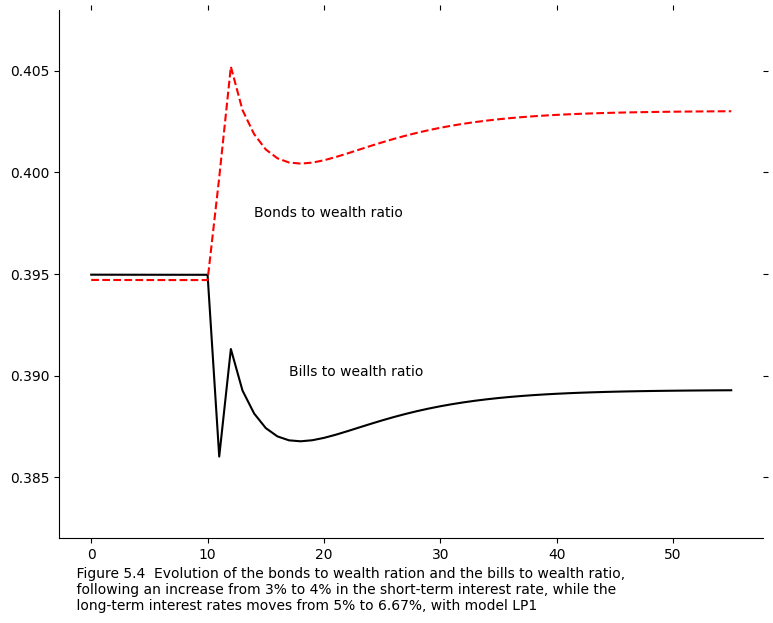

In [6]:
caption = '''
    Figure 5.4  Evolution of the bonds to wealth ration and the bills to wealth ratio,
    following an increase from 3% to 4% in the short-term interest rate, while the
    long-term interest rates moves from 5% to 6.67%, with model LP1'''
bhdata = [s['Bh']/s['V'] for s in lp1.solutions[5:]]
pdata = [s['Pbl']*s['BLh']/s['V'] for s in lp1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.382, 0.408)

axes.plot(bhdata, 'k')
axes.plot(pdata, linestyle='--', color='r')

# add labels
plt.text(14, 0.3978, 'Bonds to wealth ratio')
plt.text(17, 0.39, 'Bills to wealth ratio')
fig.text(0.1, -.05, caption);

### Model LP2

In [7]:
def create_lp2_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by government')
    model.var('BLd', desc='Demand for government bonds')
    model.var('BLh', desc='Government bonds held by households')
    model.var('BLs', desc='Supply of government bonds')
    model.var('CG', desc='Capital gains on bonds')
    model.var('CGe', desc='Expected capital gains on bonds')
    model.var('C', desc='Consumption')
    model.var('ERrbl', desc='Expected rate of return on bonds')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('Pbl', desc='Price of bonds')
    model.var('Pble', desc='Expected price of bonds')
    model.var('Rb', desc='Interest rate on government bills')
    model.var('Rbl', desc='Interest rate on government bonds')
    model.var('T', desc='Taxes')
    model.var('TP', desc='Target proportion in households portfolio')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YDr', desc='Regular disposable income of households')
    model.var('YDre', desc='Expected regular disposable income of households')
    model.var('z1', desc='Switch parameter')
    model.var('z2', desc='Switch parameter')

    model.set_param_default(0)
    model.param('add', desc='Random shock to expectations')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('beta', desc='Adjustment parameter in price of bills')
    model.param('betae', desc='Adjustment parameter in expectations')
    model.param('bot', desc='Bottom value for TP')
    model.param('chi', desc='Weight of conviction in expected bond price')
    model.param('lambda10', desc='Parameter in asset demand function')
    model.param('lambda12', desc='Parameter in asset demand function')
    model.param('lambda13', desc='Parameter in asset demand function')
    model.param('lambda14', desc='Parameter in asset demand function')
    model.param('lambda20', desc='Parameter in asset demand function')
    model.param('lambda22', desc='Parameter in asset demand function')
    model.param('lambda23', desc='Parameter in asset demand function')
    model.param('lambda24', desc='Parameter in asset demand function')
    model.param('lambda30', desc='Parameter in asset demand function')
    model.param('lambda32', desc='Parameter in asset demand function')
    model.param('lambda33', desc='Parameter in asset demand function')
    model.param('lambda34', desc='Parameter in asset demand function')
    model.param('theta', desc='Tax rate')
    model.param('top', desc='Top value for TP')

    model.param('G', desc='Government goods')
    model.param('Pblbar', desc='Exogenously set price of bonds')
    model.param('Rbar', desc='Exogenously set interest rate on govt bills')

    model.add('Y = C + G')                                  # 5.1
    model.add('YDr = Y - T + Rb(-1)*Bh(-1) + BLh(-1)')      # 5.2
    model.add('T = theta *(Y + Rb(-1)*Bh(-1) + BLh(-1))')    # 5.3
    model.add('V - V(-1) = (YDr - C) + CG')                 # 5.4
    model.add('CG = (Pbl - Pbl(-1))*BLh(-1)')
    model.add('C = alpha1*YDre + alpha2*V(-1)')
    model.add('Ve = V(-1) + (YDre - C) + CG')
    model.add('Hh = V - Bh - Pbl*BLh')
    model.add('Hd = Ve - Bd - Pbl*BLd')
    model.add('Bd = Ve*lambda20 + Ve*lambda22*Rb' +
              '- Ve*lambda23*ERrbl - lambda24*YDre')
    model.add('BLd = (Ve*lambda30 - Ve*lambda32*Rb ' +
              '+ Ve*lambda33*ERrbl - lambda34*YDre)/Pbl')
    model.add('Bh = Bd')
    model.add('BLh = BLd')
    model.add('Bs - Bs(-1) = (G + Rb(-1)*Bs(-1) + BLs(-1))' +
              ' - (T + Rb(-1)*Bcb(-1)) - Pbl*(BLs - BLs(-1))')
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')
    model.add('Bcb = Bs - Bh')
    model.add('BLs = BLh')
    model.add('ERrbl = Rbl + ((chi * (Pble - Pbl))/ Pbl)')
    model.add('Rbl = 1./Pbl')
    model.add('Pble = Pble(-1) - betae*(Pble(-1) - Pbl) + add')
    model.add('CGe = chi * (Pble - Pbl)*BLh')
    model.add('YDre = YDr(-1)')
    model.add('Rb = Rbar')
    model.add('Pbl = (1 + z1*beta - z2*beta)*Pbl(-1)')
    model.add('z1 = if_true(TP > top)')
    model.add('z2 = if_true(TP < bot)')
    model.add('TP = (BLh(-1)*Pbl(-1))/(BLh(-1)*Pbl(-1) + Bh(-1))')

    return model

lp2_parameters = {'alpha1': 0.8,
                  'alpha2': 0.2,
                  'beta': 0.01,
                  'betae': 0.5,
                  'chi': 0.1,
                  'lambda20': 0.44196,
                  'lambda22': 1.1,
                  'lambda23': 1,
                  'lambda24': 0.03,
                  'lambda30': 0.3997,
                  'lambda32': 1,
                  'lambda33': 1.1,
                  'lambda34': 0.03,
                  'theta': 0.1938,
                  'bot': 0.495,
                  'top': 0.505 }
lp2_exogenous = {'G': 20,
                 'Rbar': 0.03,
                 'Pblbar': 20,
                 'add': 0}
lp2_variables = {'V': 95.803,
                 'Bh': 37.839,
                 'Bs': 57.964,
                 'Bcb': 57.964 - 37.839,
                 'BLh': 1.892,
                 'BLs': 1.892,
                 'Hs': 20.125,
                 'YDr': 95.803,
                 'Rb': 0.03,
                 'Pbl': 20,
                 'Pble': 20,
                 'TP': 1.892*20/(1.892*20+37.839), # BLh*Pbl/(BLh*Pbl+Bh)
                 'z1': 0,
                 'z2': 0}

### Scenario: interest rate shock

In [8]:
lp2_bill = create_lp2_model()

lp2_bill.set_values(lp2_parameters)
lp2_bill.set_values(lp2_exogenous)
lp2_bill.set_values(lp2_variables)

lp2_bill.set_values({'z1': lp2_bill.evaluate('if_true(TP > top)'),
                     'z2': lp2_bill.evaluate('if_true(TP < bot)')})

for _ in range(10):
    lp2_bill.solve(iterations=100, threshold=1e-4)

# shock the system
lp2_bill.set_values({'Rbar': 0.035})

for _ in range(45):
    lp2_bill.solve(iterations=100, threshold=1e-4)


###### Figure 5.5

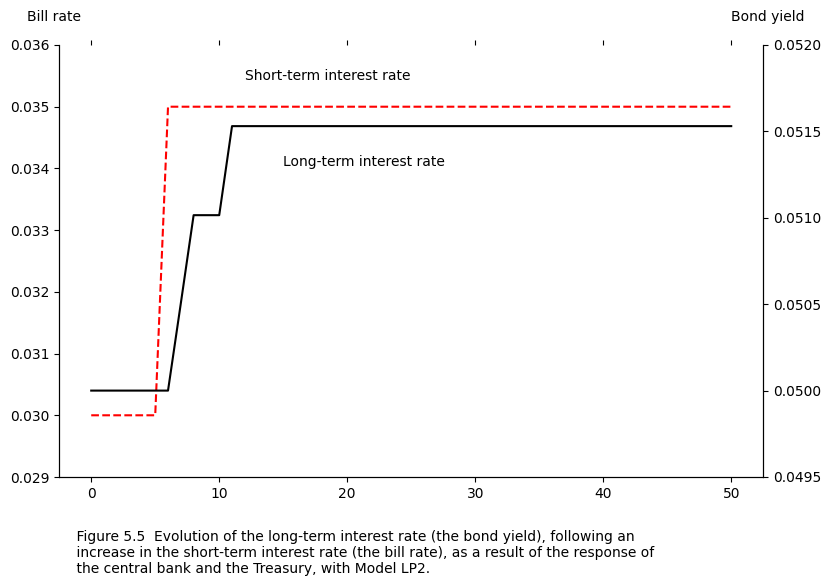

In [9]:
caption = '''
    Figure 5.5  Evolution of the long-term interest rate (the bond yield), following an
    increase in the short-term interest rate (the bill rate), as a result of the response of
    the central bank and the Treasury, with Model LP2.'''
rbdata = [s['Rb'] for s in lp2_bill.solutions[5:]]
pbldata = [1./s['Pbl'] for s in lp2_bill.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.set_ylim(0.029, 0.036)
axes.plot(rbdata, linestyle='--', color='r')


axes2 = axes.twinx()
axes2.spines['top'].set_visible(False)
axes2.set_ylim(0.0495, 0.052)

axes2.plot(pbldata, 'k')

# add labels
plt.text(12, 0.0518, 'Short-term interest rate')
plt.text(15, 0.0513, 'Long-term interest rate')
fig.text(0.05, 1.05, 'Bill rate')
fig.text(1.15, 1.05, 'Bond yield')
fig.text(0.1, -.1, caption);

###### Figure 5.6

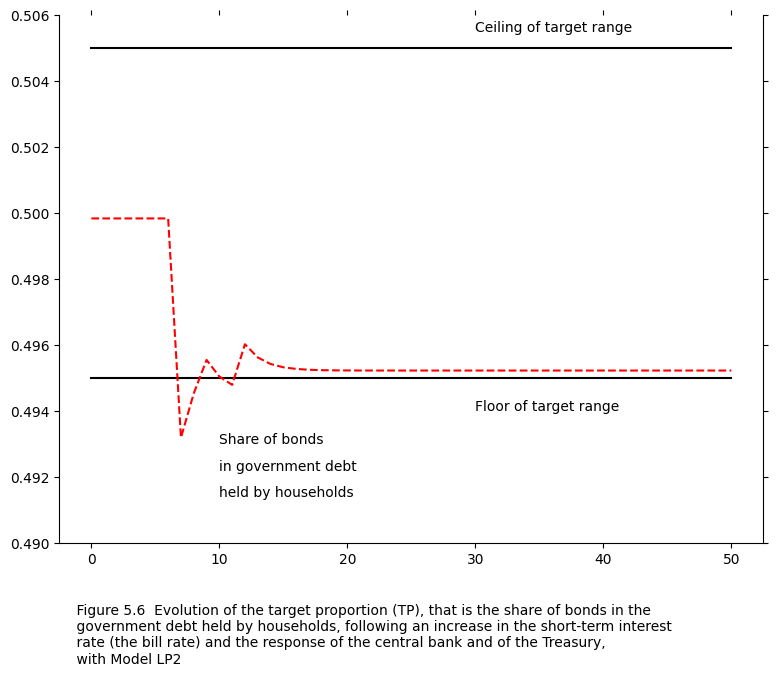

In [10]:
caption = '''
    Figure 5.6  Evolution of the target proportion (TP), that is the share of bonds in the
    government debt held by households, following an increase in the short-term interest
    rate (the bill rate) and the response of the central bank and of the Treasury, 
    with Model LP2'''
tpdata = [s['TP'] for s in lp2_bill.solutions[5:]]
topdata = [s['top'] for s in lp2_bill.solutions[5:]]
botdata = [s['bot'] for s in lp2_bill.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.set_ylim(0.490, 0.506)

axes.plot(topdata, color='k')
axes.plot(botdata, color='k')
axes.plot(tpdata, linestyle='--', color='r')

# add labels
plt.text(30, 0.5055, 'Ceiling of target range')
plt.text(30, 0.494, 'Floor of target range')
plt.text(10, 0.493, 'Share of bonds')
plt.text(10, 0.4922, 'in government debt')
plt.text(10, 0.4914, 'held by households')
fig.text(0.1, -.15, caption);

### Scenario: Shock to the bond price expectations

In [11]:
lp2_bond = create_lp2_model()

lp2_bond.set_values(lp2_parameters)
lp2_bond.set_values(lp2_exogenous)
lp2_bond.set_values(lp2_variables)
lp2_bond.set_values({'z1': 'if_true(TP > top)',
                     'z2': 'if_true(TP < bot)'})

for _ in range(10):
    lp2_bond.solve(iterations=100, threshold=1e-5)
    
# shock the system
lp2_bond.set_values({'add': -3})
lp2_bond.solve(iterations=100, threshold=1e-5)
lp2_bond.set_values({'add': 0})

for _ in range(43):
    lp2_bond.solve(iterations=100, threshold=1e-4)


###### Figure 5.7

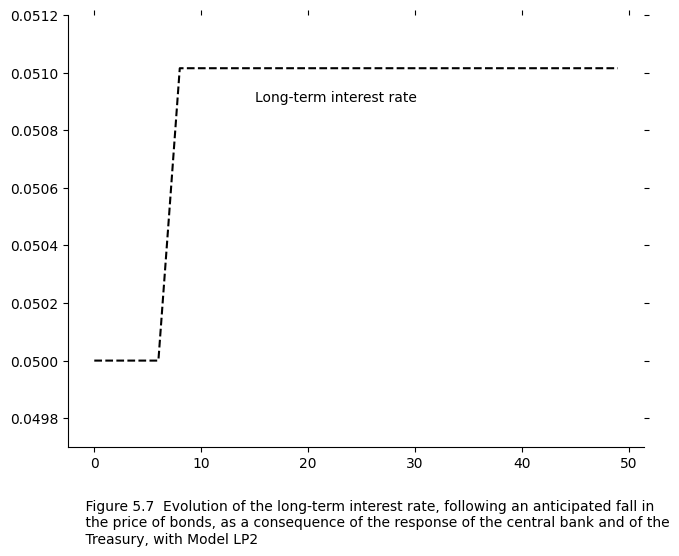

In [12]:
caption = '''
    Figure 5.7  Evolution of the long-term interest rate, following an anticipated fall in
    the price of bonds, as a consequence of the response of the central bank and of the
    Treasury, with Model LP2'''
pbldata = [1./s['Pbl'] for s in lp2_bond.solutions[5:]]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.0497, 0.0512)

axes.plot(pbldata, linestyle='--', color='k')

# add labels
plt.text(15, 0.0509, 'Long-term interest rate')
fig.text(0.1, -.1, caption);

###### Figure 5.8

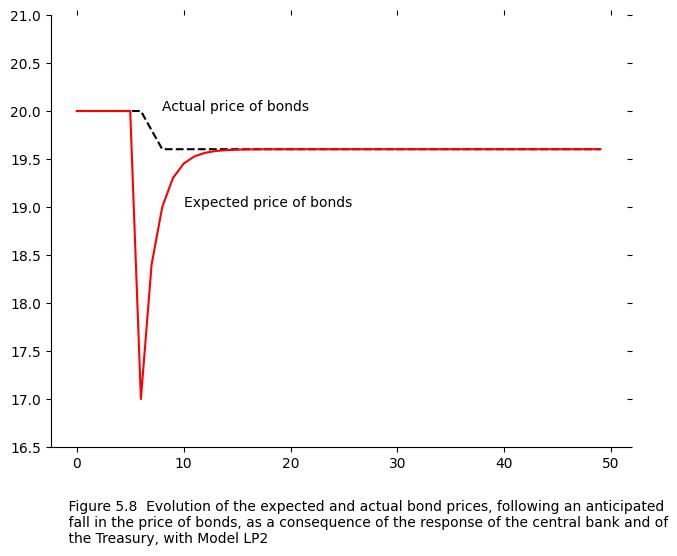

In [13]:
caption = '''
    Figure 5.8  Evolution of the expected and actual bond prices, following an anticipated
    fall in the price of bonds, as a consequence of the response of the central bank and of
    the Treasury, with Model LP2'''
pbldata = [s['Pbl'] for s in lp2_bond.solutions[5:]]
pbledata = [s['Pble'] for s in lp2_bond.solutions[5:]]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(16.5, 21)

axes.plot(pbldata, linestyle='--', color='k')
axes.plot(pbledata, linestyle='-', color='r')

# add labels
plt.text(8, 20, 'Actual price of bonds')
plt.text(10, 19, 'Expected price of bonds')
fig.text(0.1, -.1, caption);

###### Figure 5.9

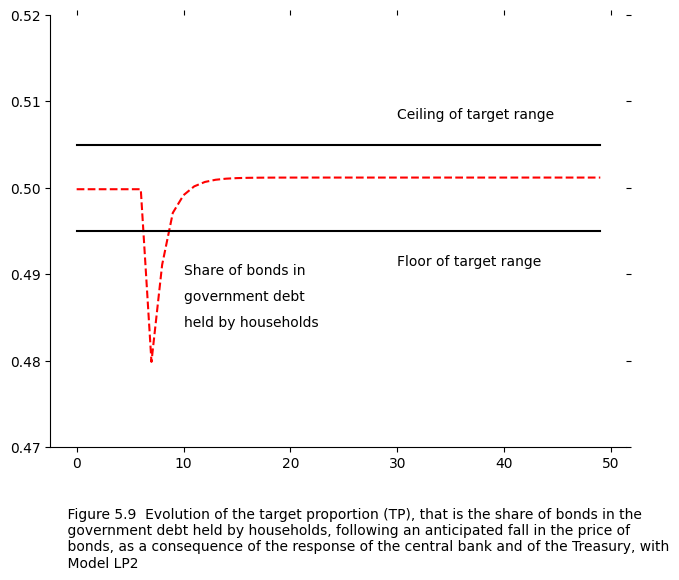

In [14]:
caption = '''
    Figure 5.9  Evolution of the target proportion (TP), that is the share of bonds in the
    government debt held by households, following an anticipated fall in the price of
    bonds, as a consequence of the response of the central bank and of the Treasury, with
    Model LP2'''
tpdata = [s['TP'] for s in lp2_bond.solutions[5:]]
botdata = [s['top'] for s in lp2_bond.solutions[5:]]
topdata = [s['bot'] for s in lp2_bond.solutions[5:]]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.47, 0.52)

axes.plot(tpdata, linestyle='--', color='r')
axes.plot(botdata, linestyle='-', color='k')
axes.plot(topdata, linestyle='-', color='k')

# add labels
plt.text(30, 0.508, 'Ceiling of target range')
plt.text(30, 0.491, 'Floor of target range')
plt.text(10, 0.49, 'Share of bonds in')
plt.text(10, 0.487, 'government debt')
plt.text(10, 0.484, 'held by households')
fig.text(0.1, -.15, caption);

### Scenario: Model LP1, propensity to consume shock

In [15]:
lp1_alpha = create_lp1_model()
lp1_alpha.set_values(lp1_parameters)
lp1_alpha.set_values(lp1_exogenous)
lp1_alpha.set_values(lp1_variables)

for _ in range(10):
    lp1_alpha.solve(iterations=100, threshold=1e-6)

# shock the system
lp1_alpha.set_values({'alpha1': 0.7})

for _ in range(45):
    lp1_alpha.solve(iterations=100, threshold=1e-6)

### Model LP3

In [16]:
def create_lp3_model():
    model = Model()

    model.set_var_default(0)
    model.var('Bcb', desc='Government bills held by the Central Bank')
    model.var('Bd', desc='Demand for government bills')
    model.var('Bh', desc='Government bills held by households')
    model.var('Bs', desc='Government bills supplied by government')
    model.var('BLd', desc='Demand for government bonds')
    model.var('BLh', desc='Government bonds held by households')
    model.var('BLs', desc='Supply of government bonds')
    model.var('CG', desc='Capital gains on bonds')
    model.var('CGe', desc='Expected capital gains on bonds')
    model.var('C', desc='Consumption')
    model.var('ERrbl', desc='Expected rate of return on bonds')
    model.var('Hd', desc='Demand for cash')
    model.var('Hh', desc='Cash held by households')
    model.var('Hs', desc='Cash supplied by the central bank')
    model.var('Pbl', desc='Price of bonds')
    model.var('Pble', desc='Expected price of bonds')
    model.var('PSBR', desc='Public sector borrowing requirement (PSBR)')
    model.var('Rb', desc='Interest rate on government bills')
    model.var('Rbl', desc='Interest rate on government bonds')
    model.var('T', desc='Taxes')
    model.var('TP', desc='Target proportion in households portfolio')
    model.var('V', desc='Household wealth')
    model.var('Ve', desc='Expected household wealth')
    model.var('Y', desc='Income = GDP')
    model.var('YDr', desc='Regular disposable income of households')
    model.var('YDre', desc='Expected regular disposable income of households')
    model.var('z1', desc='Switch parameter')
    model.var('z2', desc='Switch parameter')
    model.var('z3', desc='Switch parameter')
    model.var('z4', desc='Switch parameter')

    # no longer exogenous
    model.var('G', desc='Government goods')

    model.set_param_default(0)
    model.param('add', desc='Random shock to expectations')
    model.param('add2', desc='Addition to the government expenditure setting rule')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('beta', desc='Adjustment parameter in price of bills')
    model.param('betae', desc='Adjustment parameter in expectations')
    model.param('bot', desc='Bottom value for TP')
    model.param('chi', desc='Weight of conviction in expected bond price')
    model.param('lambda10', desc='Parameter in asset demand function')
    model.param('lambda12', desc='Parameter in asset demand function')
    model.param('lambda13', desc='Parameter in asset demand function')
    model.param('lambda14', desc='Parameter in asset demand function')
    model.param('lambda20', desc='Parameter in asset demand function')
    model.param('lambda22', desc='Parameter in asset demand function')
    model.param('lambda23', desc='Parameter in asset demand function')
    model.param('lambda24', desc='Parameter in asset demand function')
    model.param('lambda30', desc='Parameter in asset demand function')
    model.param('lambda32', desc='Parameter in asset demand function')
    model.param('lambda33', desc='Parameter in asset demand function')
    model.param('lambda34', desc='Parameter in asset demand function')
    model.param('theta', desc='Tax rate')
    model.param('top', desc='Top value for TP')

    model.param('Pblbar', desc='Exogenously set price of bonds')
    model.param('Rbar', desc='Exogenously set interest rate on govt bills')

    model.add('Y = C + G')                                  # 5.1
    model.add('YDr = Y - T + Rb(-1)*Bh(-1) + BLh(-1)')      # 5.2
    model.add('T = theta *(Y + Rb(-1)*Bh(-1) + BLh(-1))')    # 5.3
    model.add('V - V(-1) = (YDr - C) + CG')                 # 5.4
    model.add('CG = (Pbl - Pbl(-1))*BLh(-1)')
    model.add('C = alpha1*YDre + alpha2*V(-1)')
    model.add('Ve = V(-1) + (YDre - C) + CG')
    model.add('Hh = V - Bh - Pbl*BLh')
    model.add('Hd = Ve - Bd - Pbl*BLd')
    model.add('Bd = Ve*lambda20 + Ve*lambda22*Rb' +
              '- Ve*lambda23*ERrbl - lambda24*YDre')
    model.add('BLd = (Ve*lambda30 - Ve*lambda32*Rb ' +
              '+ Ve*lambda33*ERrbl - lambda34*YDre)/Pbl')
    model.add('Bh = Bd')
    model.add('BLh = BLd')
    model.add('Bs - Bs(-1) = (G + Rb(-1)*Bs(-1) + BLs(-1))' +
              ' - (T + Rb(-1)*Bcb(-1)) - Pbl*(BLs - BLs(-1))')
    model.add('Hs - Hs(-1) = Bcb - Bcb(-1)')
    model.add('Bcb = Bs - Bh')
    model.add('BLs = BLh')
    model.add('ERrbl = Rbl + ((chi * (Pble - Pbl))/ Pbl)')
    model.add('Rbl = 1./Pbl')
    model.add('Pble = Pble(-1) - betae*(Pble(-1) - Pbl) + add')
    model.add('CGe = chi * (Pble - Pbl)*BLh')
    model.add('YDre = YDr(-1)')
    model.add('Rb = Rbar')
    model.add('Pbl = (1 + z1*beta - z2*beta)*Pbl(-1)')
    model.add('z1 = if_true(TP > top)')
    model.add('z2 = if_true(TP < bot)')
    model.add('TP = (BLh(-1)*Pbl(-1))/(BLh(-1)*Pbl(-1) + Bh(-1))')
    model.add('PSBR = (G + Rb*Bs(-1) + BLs(-1)) - (T + Rb*Bcb(-1))')
    model.add('z3 = if_true((PSBR(-1)/Y(-1)) > 0.03)')
    model.add('z4 = if_true((PSBR(-1)/Y(-1)) < -0.03)')
    model.add('G = G(-1) - (z3 + z4)*PSBR(-1) + add2')

    return model

lp3_parameters = {'alpha1': 0.8,
                  'alpha2': 0.2,
                  'beta': 0.01,
                  'betae': 0.5,
                  'chi': 0.1,
                  'lambda20': 0.44196,
                  'lambda22': 1.1,
                  'lambda23': 1,
                  'lambda24': 0.03,
                  'lambda30': 0.3997,
                  'lambda32': 1,
                  'lambda33': 1.1,
                  'lambda34': 0.03,
                  'theta': 0.1938,
                  'bot': 0.495,
                  'top': 0.505 }
lp3_exogenous = {'Rbar': 0.03,
                 'Pblbar': 20,
                 'add': 0,
                 'add2': 0}
lp3_variables = {'G': 20,
                 'V': 95.803,
                 'Bh': 37.839,
                 'Bs': 57.964,
                 'Bcb': 57.964 - 37.839,
                 'BLh': 1.892,
                 'BLs': 1.892,
                 'Hs': 20.125,
                 'YDr': 95.803,
                 'Rb': 0.03,
                 'Pbl': 20,
                 'Pble': 20,
                 'PSBR': 0,
                 'Y': 115.8,
                 'TP': 1.892*20/(1.892*20+37.839), # BLh*Pbl/(BLh*Pbl+Bh)
                 'z1': 0,
                 'z2': 0,
                 'z3': 0,
                 'z4': 0}

### Scenario: LP3, decrease in propensity to consume

In [17]:
lp3_alpha = create_lp3_model()
lp3_alpha.set_values(lp3_parameters)
lp3_alpha.set_values(lp3_exogenous)
lp3_alpha.set_values(lp3_variables)

for _ in range(10):
    lp3_alpha.solve(iterations=100, threshold=1e-6)

# shock the system
lp3_alpha.set_values({'alpha1': 0.7})

for _ in range(45):
    lp3_alpha.solve(iterations=100, threshold=1e-6)

###### Figure 5.10

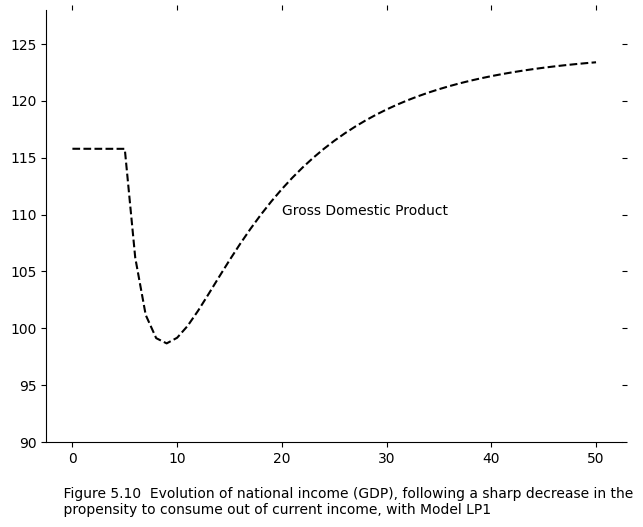

In [18]:
caption = '''
    Figure 5.10  Evolution of national income (GDP), following a sharp decrease in the
    propensity to consume out of current income, with Model LP1'''
ydata = [s['Y'] for s in lp1_alpha.solutions[5:]]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(90, 128)

axes.plot(ydata, linestyle='--', color='k')

# add labels
plt.text(20, 110, 'Gross Domestic Product')
fig.text(0.1, -.05, caption);

###### Figure 5.11

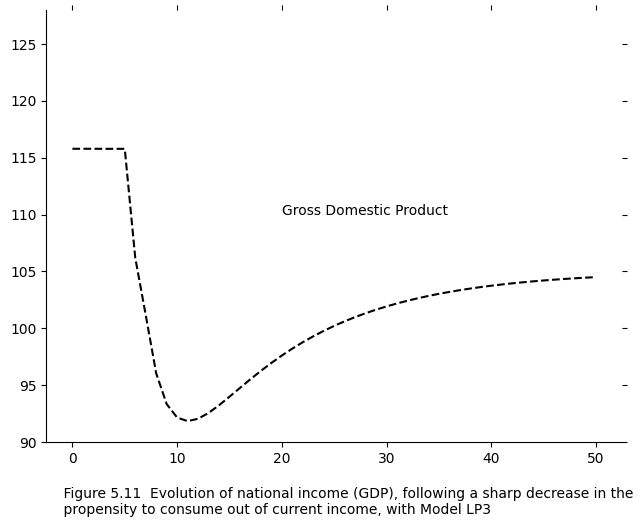

In [19]:
caption = '''
    Figure 5.11  Evolution of national income (GDP), following a sharp decrease in the
    propensity to consume out of current income, with Model LP3'''
ydata = [s['Y'] for s in lp3_alpha.solutions[5:]]
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(90, 128)

axes.plot(ydata, linestyle='--', color='k')

# add labels
plt.text(20, 110, 'Gross Domestic Product')
fig.text(0.1, -.05, caption);

###### Figure 5.12

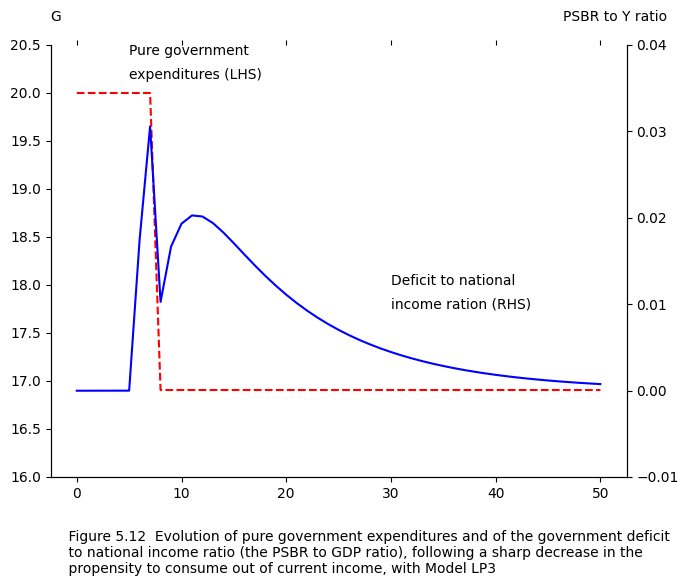

In [20]:
caption = '''
    Figure 5.12  Evolution of pure government expenditures and of the government deficit
    to national income ratio (the PSBR to GDP ratio), following a sharp decrease in the
    propensity to consume out of current income, with Model LP3'''
gdata = [s['G'] for s in lp3_alpha.solutions[5:]]
ratiodata = [s['PSBR']/s['Y'] for s in lp3_alpha.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.tick_params(top='off')
axes.spines['top'].set_visible(False)
axes.set_ylim(16, 20.5)
axes.plot(gdata, linestyle='--', color='r')

plt.text(5, 20.4, 'Pure government')
plt.text(5, 20.15, 'expenditures (LHS)')
plt.text(30, 18, 'Deficit to national')
plt.text(30, 17.75, 'income ration (RHS)')

axes2 = axes.twinx()
axes2.tick_params(top='off')
axes2.spines['top'].set_visible(False)
axes2.set_ylim(-.01, 0.04)
axes2.plot(ratiodata, linestyle='-', color='b')

# add labels
fig.text(0.1, 1.05, 'G')
fig.text(0.9, 1.05, 'PSBR to Y ratio')
fig.text(0.1, -.1, caption);